# Matplotlib

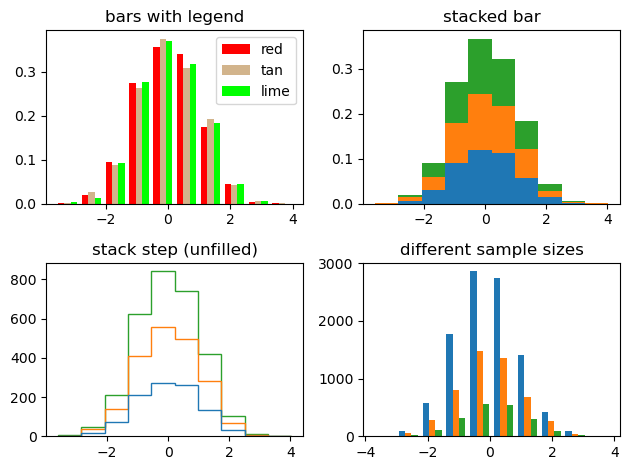

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

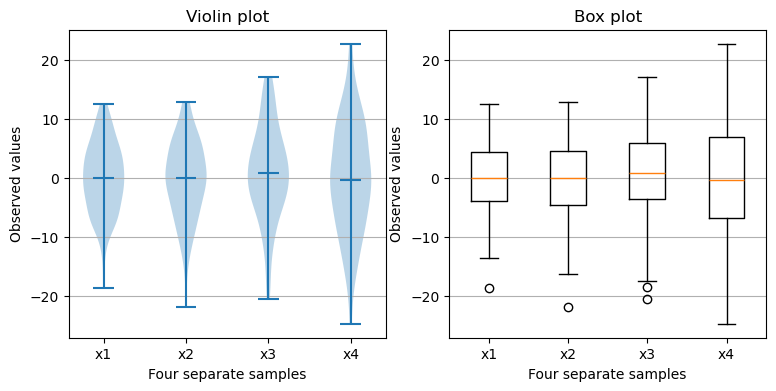

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

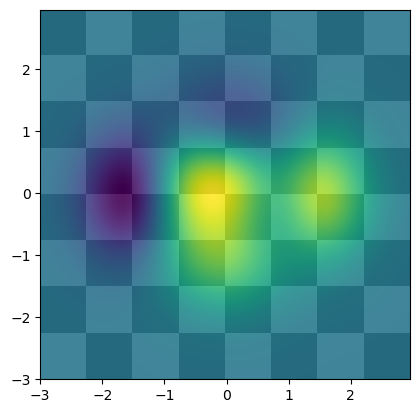

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects

extent = np.min(x), np.max(x), np.min(y), np.max(y)
fig = plt.figure(frameon=False)

Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)

Z2 = func3(X, Y)

im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',
                 extent=extent)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

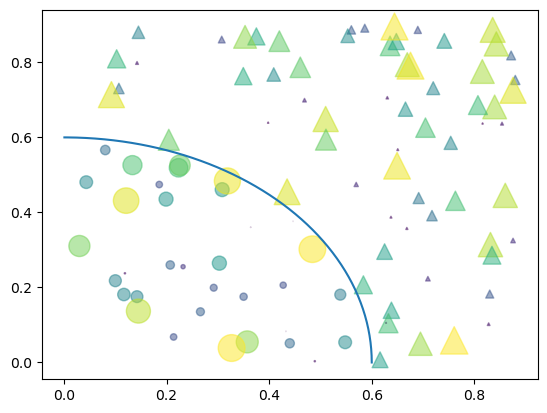

In [11]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c, alpha=0.5)
plt.scatter(x, y, s=area2, marker='o', c=c, alpha=0.5)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

In [19]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    releases = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            releases.append(item['tag_name'].lstrip("v"))

    from pprint import pprint
    pprint(data)

except Exception:
    print('Hardcoded data!!!!!')
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    releases = ['2.2.4', '3.0.3', '3.0.2', '3.0.1', '3.0.0', '2.2.3',
                '2.2.2', '2.2.1', '2.2.0', '2.1.2', '2.1.1', '2.1.0',
                '2.0.2', '2.0.1', '2.0.0', '1.5.3', '1.5.2', '1.5.1',
                '1.5.0', '1.4.3', '1.4.2', '1.4.1', '1.4.0']
    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]  # Convert strs to dates.
releases = [tuple(release.split('.')) for release in releases]  # Split by component.
dates, releases = zip(*sorted(zip(dates, releases)))  # Sort by increasing date.

[{'assets': [],
  'assets_url': 'https://api.github.com/repos/matplotlib/matplotlib/releases/243609520/assets',
  'author': {'avatar_url': 'https://avatars.githubusercontent.com/u/2501846?v=4',
             'events_url': 'https://api.github.com/users/ksunden/events{/privacy}',
             'followers_url': 'https://api.github.com/users/ksunden/followers',
             'following_url': 'https://api.github.com/users/ksunden/following{/other_user}',
             'gists_url': 'https://api.github.com/users/ksunden/gists{/gist_id}',
             'gravatar_id': '',
             'html_url': 'https://github.com/ksunden',
             'id': 2501846,
             'login': 'ksunden',
             'node_id': 'MDQ6VXNlcjI1MDE4NDY=',
             'organizations_url': 'https://api.github.com/users/ksunden/orgs',
             'received_events_url': 'https://api.github.com/users/ksunden/received_events',
             'repos_url': 'https://api.github.com/users/ksunden/repos',
             'site_admin': F

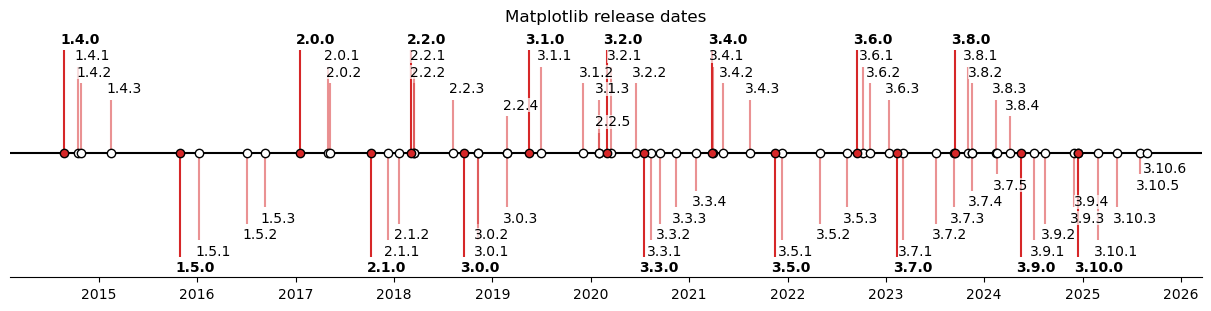

<Figure size 640x480 with 0 Axes>

In [25]:
# Choose some nice levels: alternate meso releases between top and bottom, and
# progressively shorten the stems for micro releases.
levels = []
macro_meso_releases = sorted({release[:2] for release in releases})
for release in releases:
    macro_meso = release[:2]
    micro = int(release[2])
    h = 1 + 0.8 * (5 - micro)
    level = h if macro_meso_releases.index(macro_meso) % 2 == 0 else -h
    levels.append(level)


def is_feature(release):
    """Return whether a version (split into components) is a feature release."""
    return release[-1] == '0'


# The figure and the axes.
fig, ax = plt.subplots(figsize=(12, 3), layout="constrained")
ax.set(title="Matplotlib release dates")

# The vertical stems.
ax.vlines(dates, 0, levels,
          color=[("tab:red", 1 if is_feature(release) else .5) for release in releases])
# The baseline.
ax.axhline(0, c="black")
# The markers on the baseline.
meso_dates = [date for date, release in zip(dates, releases) if is_feature(release)]
micro_dates = [date for date, release in zip(dates, releases)
               if not is_feature(release)]
ax.plot(micro_dates, np.zeros_like(micro_dates), "ko", mfc="white")
ax.plot(meso_dates, np.zeros_like(meso_dates), "ko", mfc="tab:red")

# Annotate the lines.
for date, level, release in zip(dates, levels, releases):
    version_str = '.'.join(release)
    ax.annotate(version_str, xy=(date, level),
                xytext=(-3, np.sign(level)*3), textcoords="offset points",
                verticalalignment="bottom" if level > 0 else "top",
                weight="bold" if is_feature(release) else "normal",
                bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))

ax.xaxis.set(major_locator=mdates.YearLocator(),
             major_formatter=mdates.DateFormatter("%Y"))

# Remove the y-axis and some spines.
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)

plt.savefig('demo.png')
plt.show()

In [62]:
x = np.linspace(0, 10, 20)
y = np.sin(x)/(x+1)

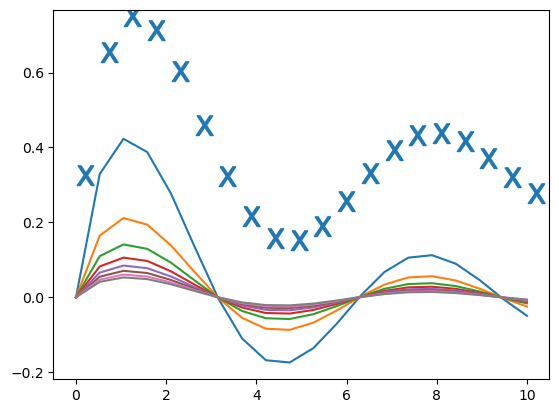

In [79]:
from matplotlib.text import TextPath

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y/2)
ax.plot(x, y/3)
ax.plot(x, y/4)
ax.plot(x, y/5)
ax.plot(x, y/6)
ax.plot(x, y/7)
ax.plot(x, y/8)

# ax.plot(x, y + 0.3, marker='+')
ax.scatter(x, y + 0.3, marker=TextPath((0, 0), "X"), s=800)



plt.show()

In [53]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [58]:
matplotlib.style.use('default')